In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
WORK_DIR = 'C:\\Users\\thoma\\Box Sync\\00Professional\\01Research\\01_Projects\\moving_average\\'
DATA_DIR = WORK_DIR + 'data\\'
OUT_DIR = WORK_DIR + 'out\\'

CSV_PATH = DATA_DIR + 'ChlorideRS1_RS2.csv'

In [9]:
parse_dates = ['Resulted', 'Verified']
df = pd.read_csv(CSV_PATH, parse_dates=parse_dates)

In [10]:
df.head()

,Test,Component,Value,Method,Resulted,Verified
0,QC,Chloride,104,RS1,2017-01-15 22:22:00,2017-01-15 22:26:00
1,QC,Chloride,105,RS1,2017-01-16 06:07:00,2017-01-16 06:11:00
2,QC,Chloride,105,RS1,2017-01-16 06:36:00,2017-01-16 06:52:00
3,QC,Chloride,106,RS1,2017-01-15 00:15:00,2017-01-15 00:21:00
4,QC,Chloride,106,RS1,2017-01-16 02:02:00,2017-01-16 02:16:00


In [11]:
def df_to_series(df, test, method):
    
    # get the requested test and method and create a new DF
    df_ = df.loc[(df.Test == test) & (df.Method == method)]
    
    # take just the data and the value columns
    df_ = df_[['Resulted','Value']]
    
    # save to csv
    df_.to_csv('{}_{}.csv'.format(test, method), index=False)

    # read csv back in as a series
    series = pd.Series.from_csv('{}_{}.csv'.format(test, method),header=0)
    
    return series


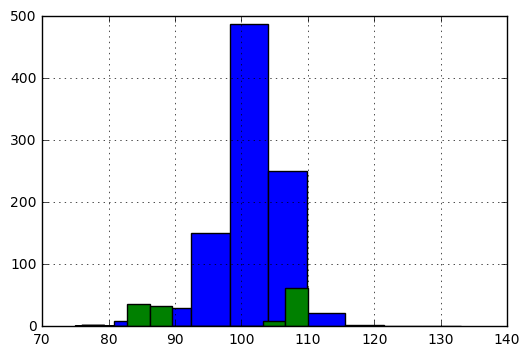

In [12]:
CMP_RS1_series = df_to_series(df, 'CMP', 'RS1')
QC_RS1_series = df_to_series(df, 'QC', 'RS1')
CMP_RS1_series.hist()
QC_RS1_series.hist()

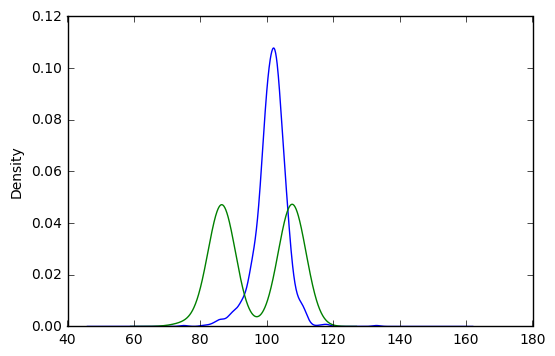

In [13]:
CMP_RS1_series.plot(kind='kde')
QC_RS1_series.plot(kind='kde')

In [14]:
normalCMP_RS1_series = CMP_RS1_series[(CMP_RS1_series <= 108) & (CMP_RS1_series >= 96)]
lowQC_RS1_series = QC_RS1_series[QC_RS1_series <= 95]
highQC_RS1_series = QC_RS1_series[QC_RS1_series >= 95]

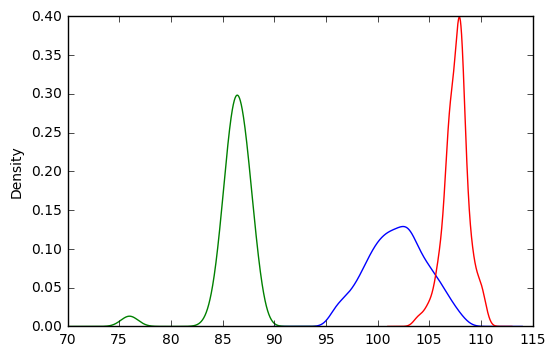

In [15]:
normalCMP_RS1_series.plot(kind='kde')
lowQC_RS1_series.plot(kind='kde')
highQC_RS1_series.plot(kind='kde')

In [16]:
highQC_RS1_series.describe()

count     71.000000
mean     107.619718
std        1.138498
min      104.000000
25%      107.000000
50%      108.000000
75%      108.000000
max      110.000000
Name: Value, dtype: float64

In [17]:
lowQC_RS1_series.describe()

count    72.000000
mean     86.152778
std       1.969197
min      76.000000
25%      86.000000
50%      86.000000
75%      87.000000
max      88.000000
Name: Value, dtype: float64

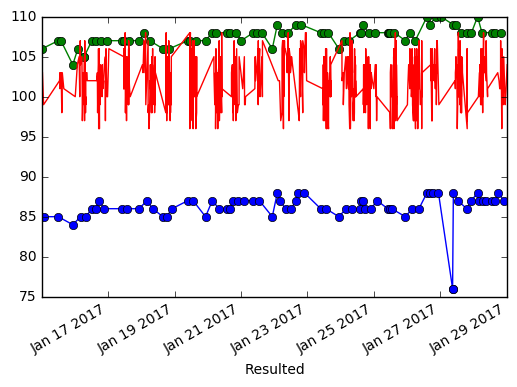

In [19]:
lowQC_RS1_series.plot(marker="o")
highQC_RS1_seriesplot(marker="o")
normalCMP_RS1_series.plot()

How do we know which QC to look at for any given period

In [66]:
df.Test.value_counts()

BMP             5027
CMP             1910
QC               298
ELECTROLYTES      77
Chloride           3
Name: Test, dtype: int64

In [65]:
len(CMP_RS1_series)

955

How do we know if QC is out with just the values?
Which QC is pre or post run
How can we identify 'runs' of specimens

In [22]:
highQC_RS1_series['2017-01-18 07:25:00':'2017-01-20 05:32:00']


Resulted
2017-01-18 15:32:00    106
2017-01-18 20:12:00    106
2017-01-19 09:27:00    107
2017-01-19 11:05:00    107
2017-01-19 15:09:00    107
2017-01-19 22:18:00    107
2017-01-20 03:12:00    108
Name: Value, dtype: int64

In [40]:
rolling.mean?

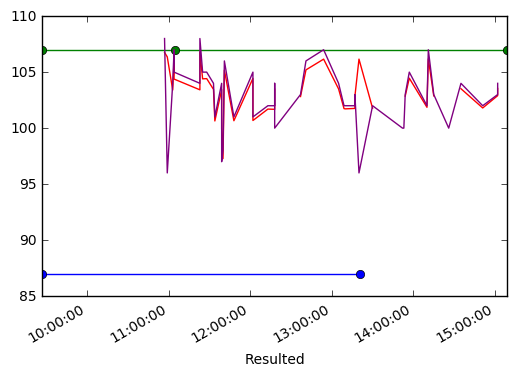

In [42]:
rolling = normalCMP_RS1_series.rolling(window=50)
moving_avg = rolling.mean()

lowQC_RS1_series['2017-01-19 09:27:00':'2017-01-19 15:09:00'].plot(marker="o")
highQC_RS1_series['2017-01-19 09:27:00':'2017-01-19 15:09:00'].plot(marker="o")
#CMP_RS1_series.plot()
moving_avg['2017-01-19 09:27:00':'2017-01-19 15:09:00'].plot(color='red')
normalCMP_RS1_series['2017-01-19 09:27:00':'2017-01-19 15:09:00'].plot(color='purple')